In [1]:
#Importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Matplotlib is building the font cache; this may take a moment.


## 1. Importing, Understanding, and Inspecting Data

In [13]:
#Importing the Data
df=pd.read_excel(r"C:\Users\somanna\Desktop\Keerthan personal\Projects\heart.xlsx")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Variable Description

    age--------age in years
    sex--------(1 = male; 0 = female)
    cp---------chest pain type
    tretbps---resting blood pressure (in mm Hg on admission to the hospital)
    chol-------serum cholestoral in mg/dl
    fbs--------fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg----resting electrocardiographic results
    thalach----maximum heart rate achieved
    exng------exercise induced angina (1 = yes; 0 = no)
    oldpeak----ST depression induced by exercise relative to rest
    slp------the slope of the peak exercise ST segment
    caa---------number of major vessels (0-3) colored by flourosopy
    thal-------3 = normal; 6 = fixed defect; 7 = reversable defect

In [14]:
#Structure of Data
df.shape

(303, 14)

In [15]:
#Checking Null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [17]:
#Checking duplicates value
print("Total no of Duplicate values: ",df.duplicated().sum())

Total no of Duplicate values:  1


In [18]:
#Dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [19]:
#Statistical analysis of dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Conclusions

    The structure of data say it has 14 features and 303 records
    The data set has no missing values
    1 duplicate record is found and was dropped

## 2. Performing EDA and Modeling:

In [ ]:
#Data preprocessing for plotting
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return "Female"
    else:
        return "Male"
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return "HeartDisease"
    else:
        return "No Heart Disease"
df2['target'] = df2['target'].apply(chng2)

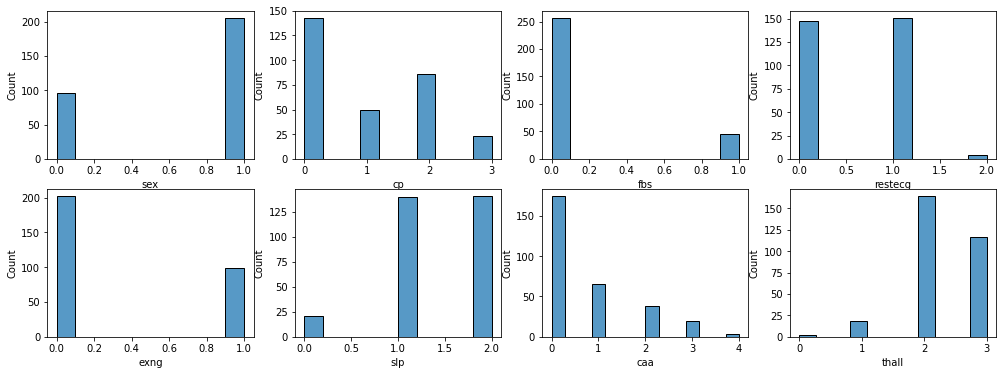

In [21]:
#Categorical value analysis
f, axes = plt.subplots(2,4,figsize=(17,6))
sns.histplot(data=df['sex'], ax=axes[0,0])
sns.histplot(data=df['cp'], ax=axes[0,1])
sns.histplot(data=df['fbs'], ax=axes[0,2])
sns.histplot(data=df['restecg'], ax=axes[0,3])
sns.histplot(data=df['exng'], ax=axes[1,0])
sns.histplot(data=df['slp'], ax=axes[1,1])
sns.histplot(data=df['caa'], ax=axes[1,2])
sns.histplot(data=df['thall'], ax=axes[1,3])
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

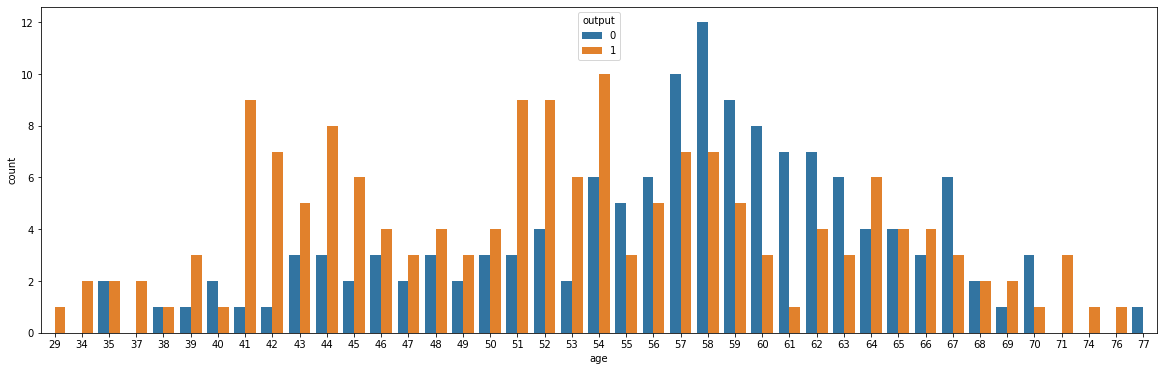

In [23]:
#CVD across different ages
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='age', hue='output')

### Conclusion
    CVD is more prominent in people whose age lies between 40-60

<AxesSubplot:xlabel='trtbps'>

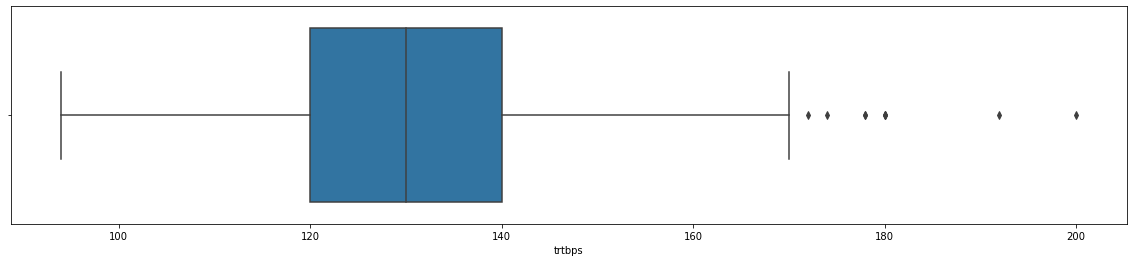

In [25]:
#Identifying outliers in resting blood pressure
plt.figure(figsize=(20,4))
sns.boxplot(x=df['trtbps'])

## Conclusion
    Outliers are observed after 170mg HG

Total affected in trestbps outliers : 4


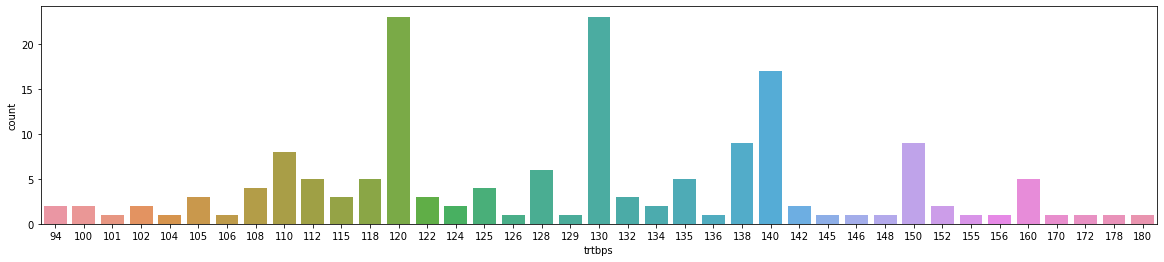

In [28]:
#Heart attack based on anomalies in resting blood pressure of the patient
plt.figure(figsize=(20,4))
print("Total affected in trestbps outliers :",sum((df.trtbps[df.output==1]>=170)))
sns.countplot(x=df.trtbps[df.output==1])
plt.show()

### Conclusion
    We wont be able to to precisely detect the heart attack on anamalies in resting blood pressure as the records in that range(170-200) are insignificant in detection and cannot confirm that cvd is prominent in that range

Total women affected : 72
Total Mens affected : 92


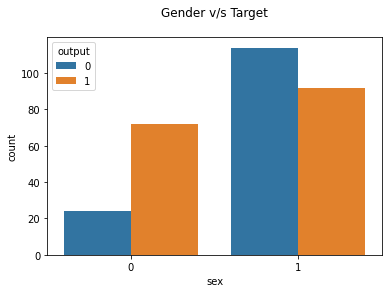

In [33]:
#Composition of overall patients w.r.t gender
df2 = df.copy()
print("Total women affected :",sum((df.sex[df.output==1]==0)))
print("Total Mens affected :",sum((df.sex[df.output==1]==1)))
sns.countplot(data= df2, x='sex',hue='output')
plt.title('Gender v/s Target\n')
plt.show()

### Conclusion
    Men are more affected by CVD

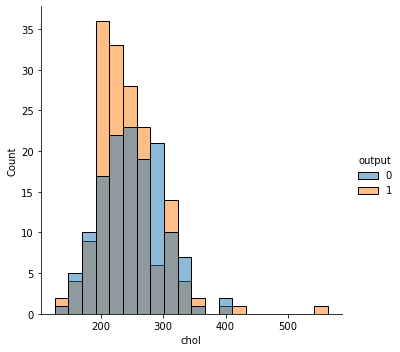

In [35]:
#Relationship between cholesterol levels and our output variable.
sns.displot(data=df, x='chol',hue='output',bins=20)
plt.show()

Conclusion
People with low cholestrol level(200-300) were are more prone to CVD

Correlation of peak exercising and CVD : 0.34393953248938663


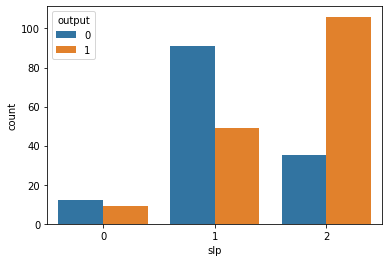

In [39]:
#Relationship between peak exercising and occurrence of heart attack
sns.countplot(data=df2, x='slp', hue='output')
print("Correlation of peak exercising and CVD :", df.slp.corr(df.output))
plt.show()

### Conclusion
    People who do more exercise have less chances of getting CVD

Corelation between thal and occurance of CVD : -0.3431007123895646


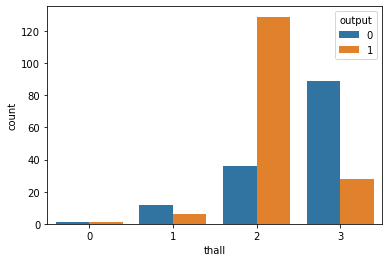

In [41]:
#thalassemia a major cause of CVD?
sns.countplot(data=df2, x='thall', hue='output')
print("Corelation between thal and occurance of CVD :", df['thall'].corr(df['output']))
plt.show()

Conclusion
Thalesemia is not a major cause of CVD and the correlation between the output variable and thall is negative

The below heatmap shows the correlation of each variable wrt to other features 



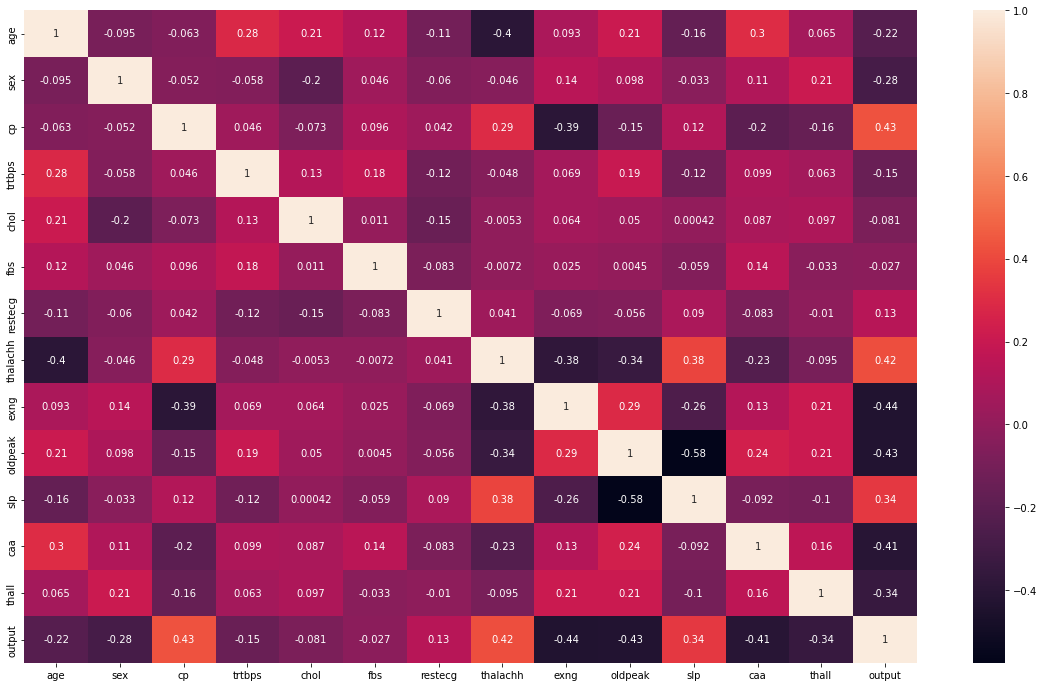

In [42]:
#Relationship between all the given variable
plt.figure(figsize=(20,12))
print("The below heatmap shows the correlation of each variable wrt to other features \n")
sns.heatmap(df.corr(), annot=True)
plt.show()

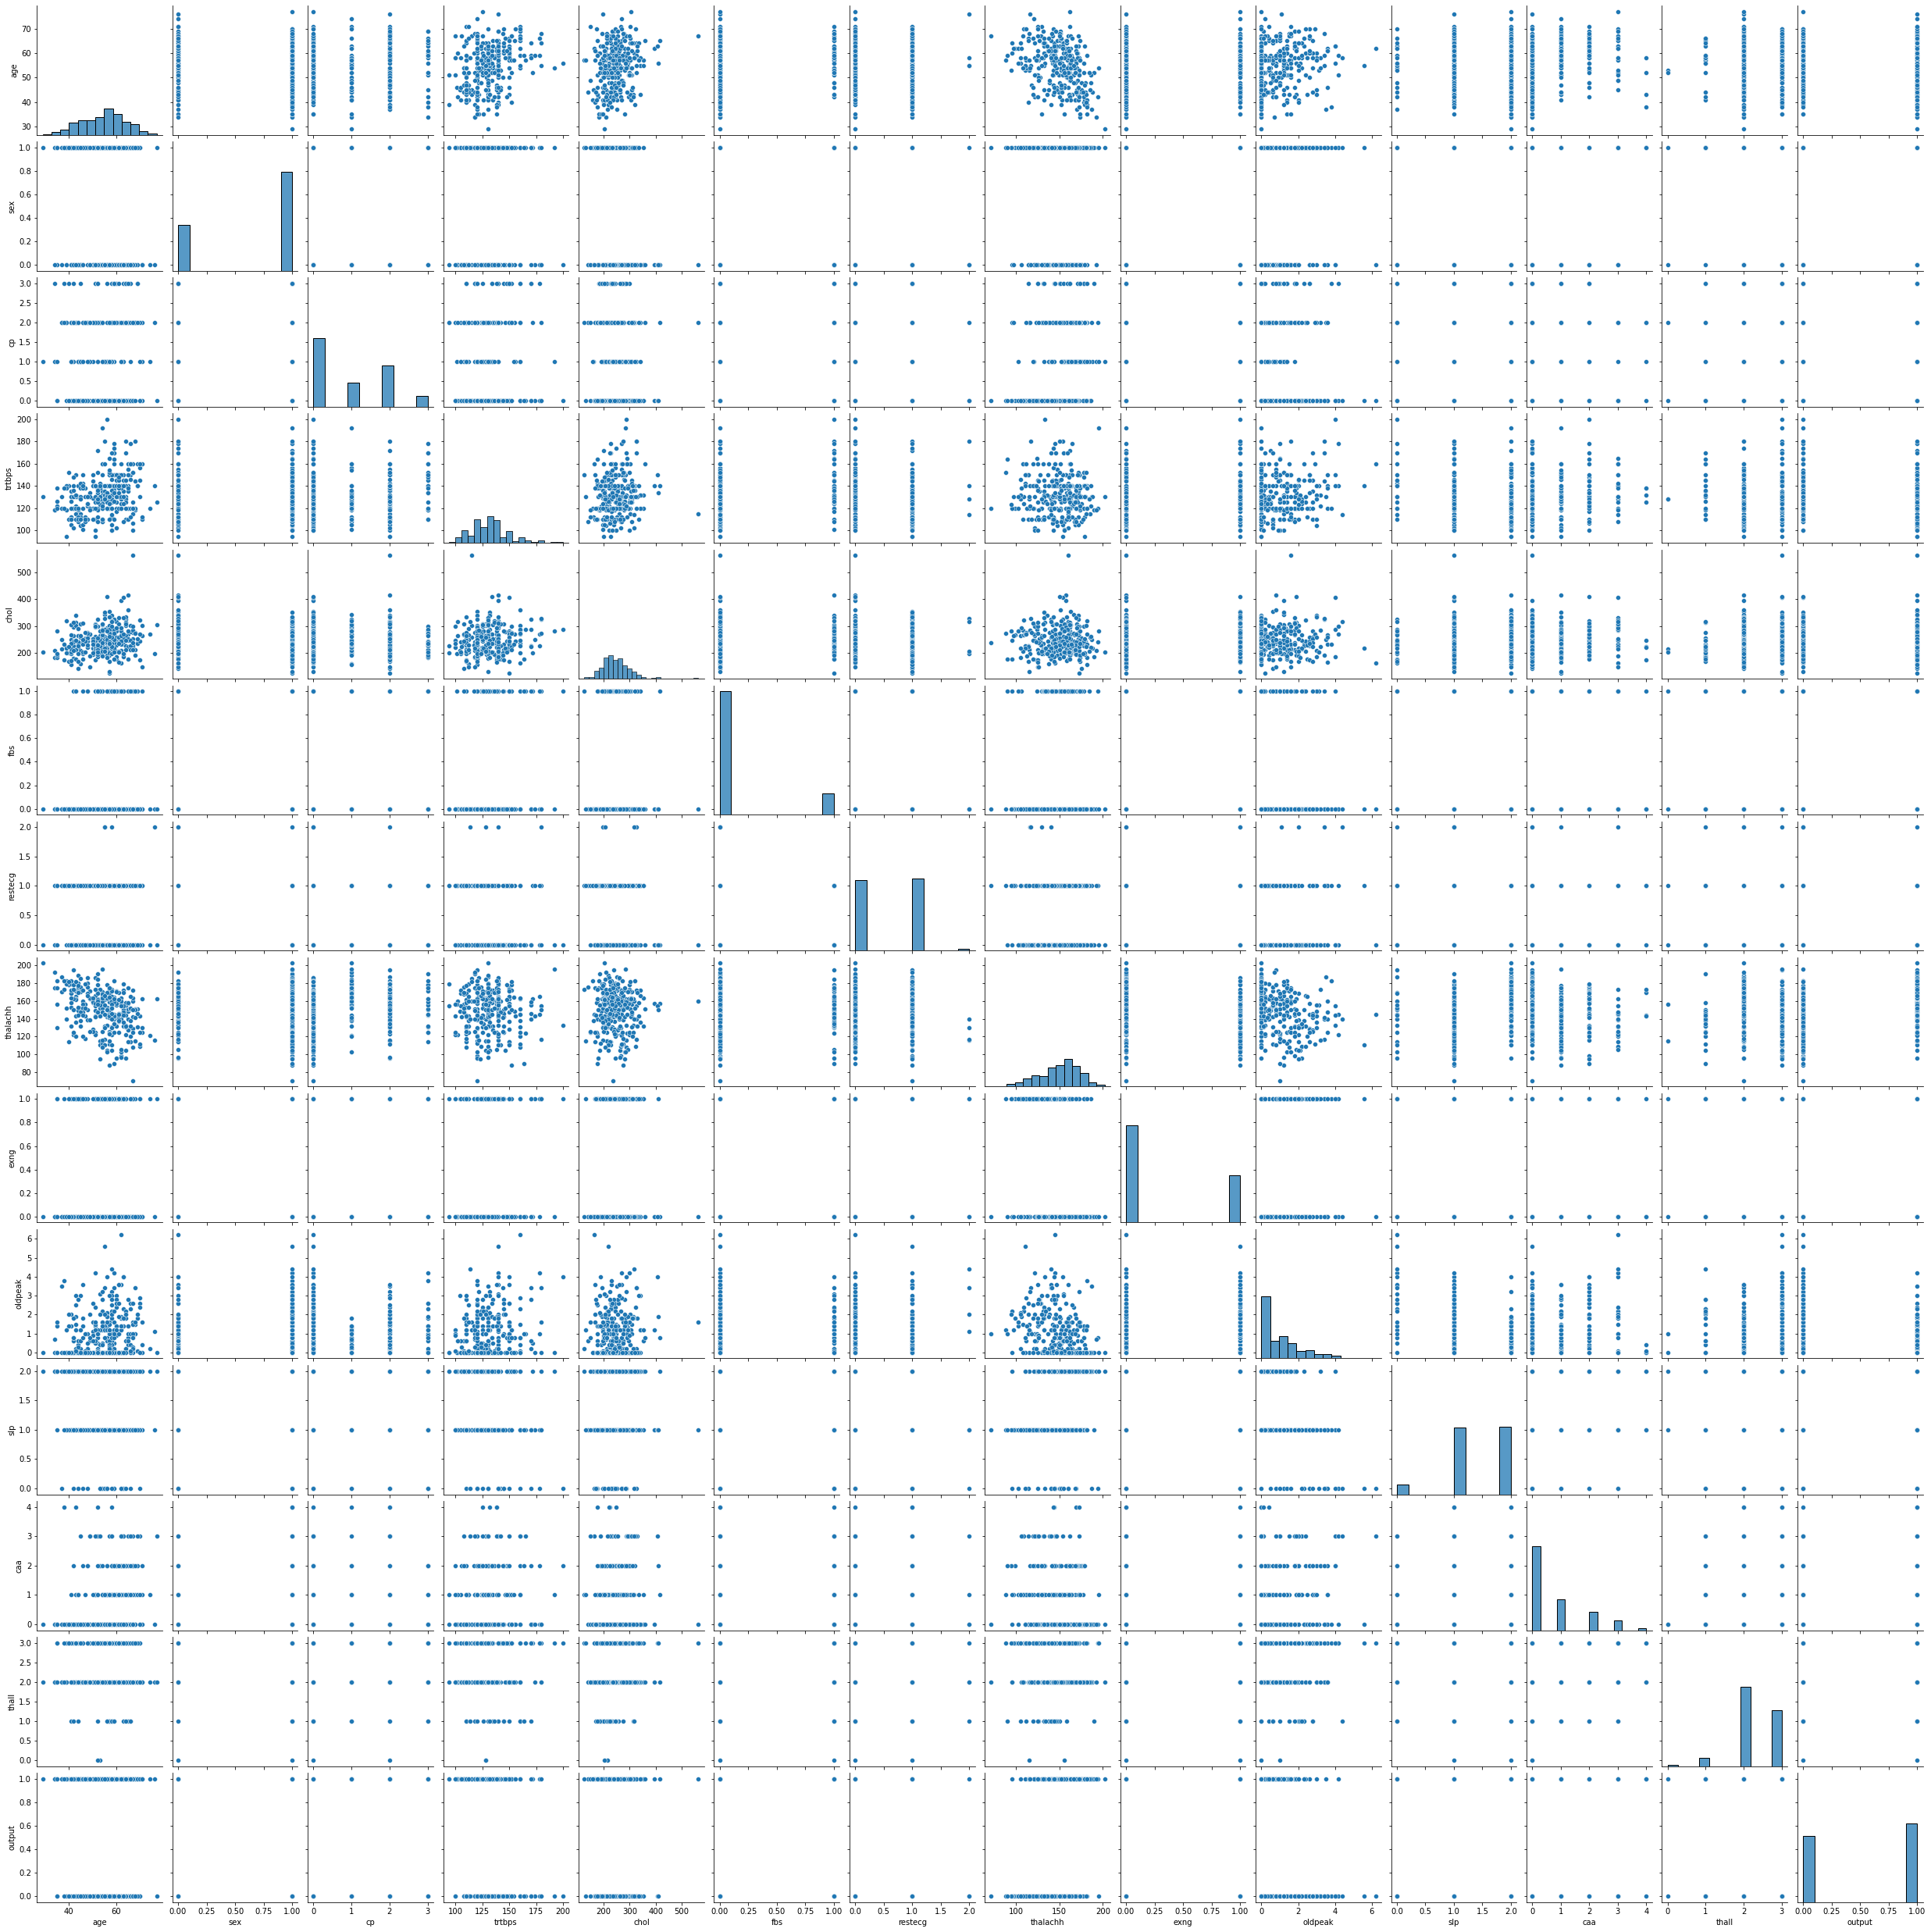

In [43]:
#Pairplot
sns.pairplot(df)

In [45]:
#Data Scaling (Since the input features have numeric range variation we will use scaling )
Scale = StandardScaler()
X = df.drop(columns='output')
y = df['output']
X = Scale.fit_transform(X)
y = df['output']


In [46]:
# Train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
Model = LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression()

In [47]:
#predicting on test data
y_pred = Model.predict(X_test)
print("Prediction on test data : \n" , y_pred)

Prediction on test data : 
 [0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1]


In [48]:
#Validation
print("Confusion Matrix is :")
print(confusion_matrix(y_test,y_pred))
print("Accurancy Score is -", accuracy_score(y_test,y_pred))

Confusion Matrix is :
[[20  4]
 [ 4 33]]
Accurancy Score is - 0.8688524590163934
